# CSE 6140 HW2

Problem 1

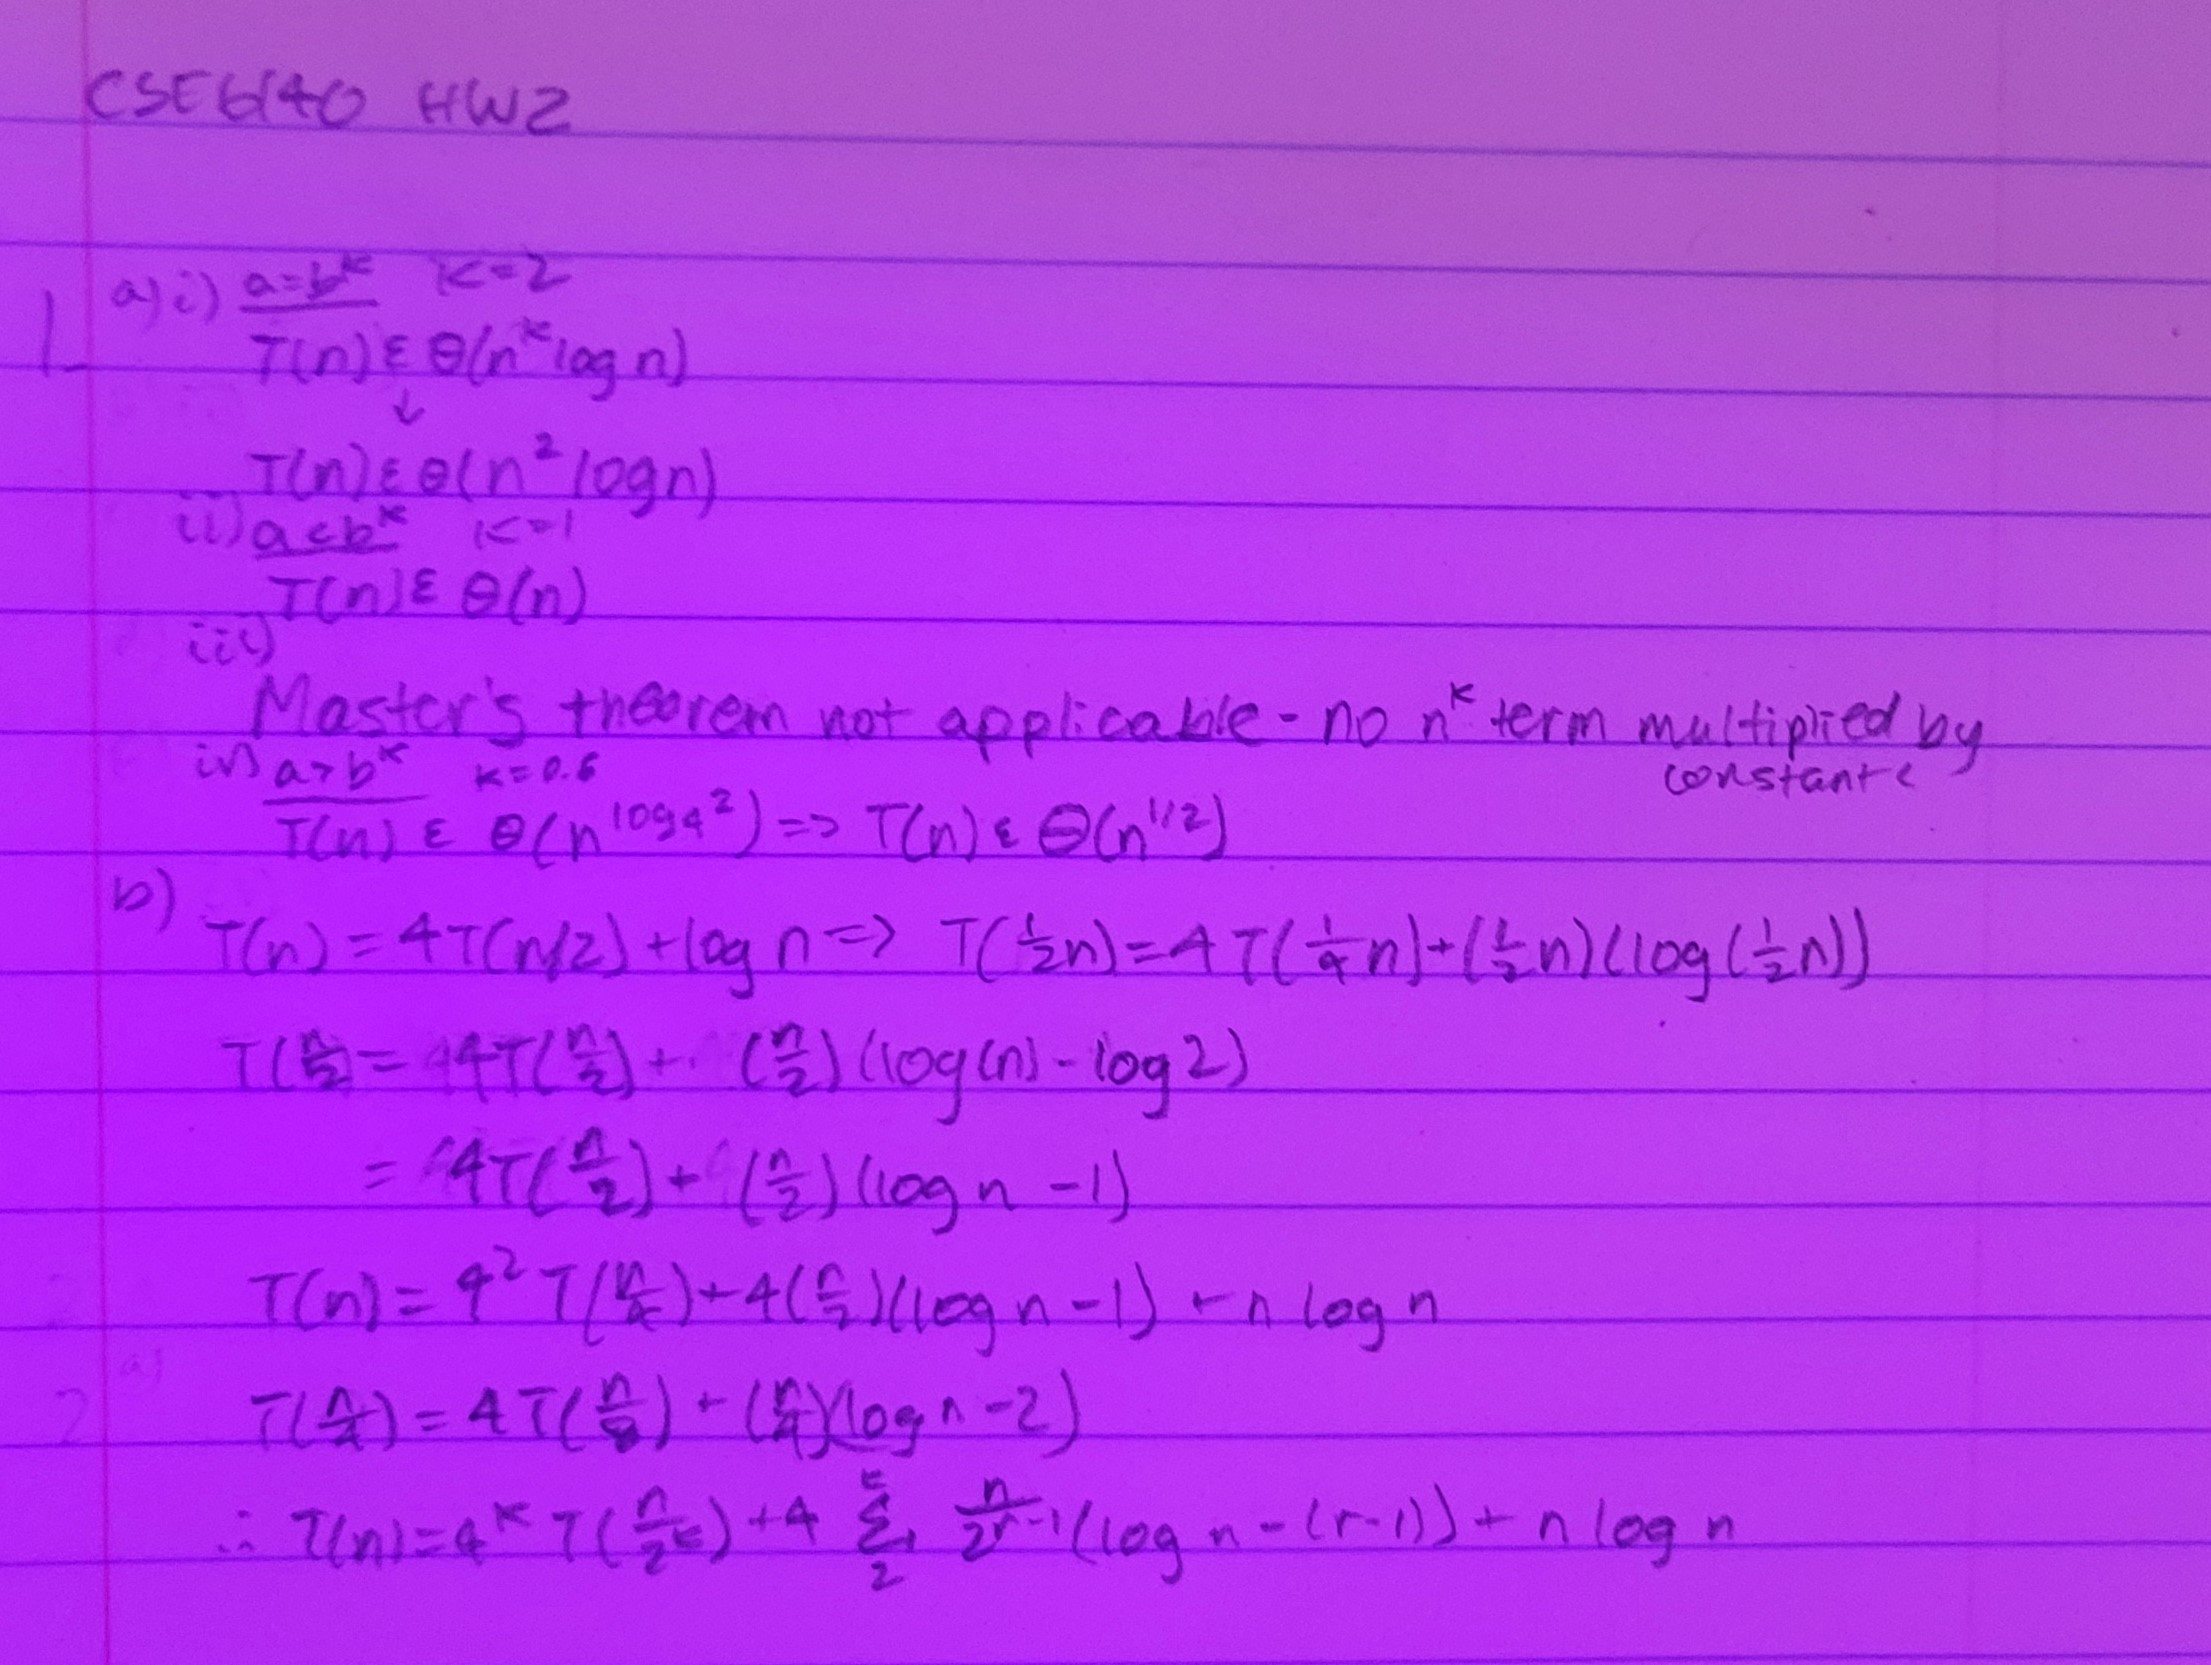

Problem 2

a) Algorithm:
> 1. Divide the array n by m elements to get subarray of elements

> 2. Use special hardare to find minimum of m elements in each subarray

> 3. Store these minimum values in a separate array
  (If length of array exceeds length of m, divide into m subproblems and repeat step 2

> 4. Find minimum value of each subarray recursively until number of subarrays is m

> 5. Get final smallest minimum value of all subarrays

The algorithm recursively executes finding the minimum, which takes T(n-1) time, and looping through each subarray takes n/m iterations which equates to approximately log n. Since the base case of T(0)=1, then the algorithm complexity is approximately 1 + log n, so the complexity would be O(n log n).

b) 

Problem 3

In [2]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install networkx

     ---------------------------------------- 2.0/2.0 MB 4.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\a2xre.DATREBIL\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [171]:
import time
import sys
import networkx as nx
from networkx.algorithms import tree
import matplotlib.pyplot as plt
from collections import defaultdict
import heapq
import numpy as np
from random import randint
from itertools import count
from math import isnan

In [236]:
gfile="C:\\Users\\a2xre.DATREBIL\\Downloads\\CSE6140\\MST\\MST\\data\\rmat1315.gr"
cfile="C:\\Users\\a2xre.DATREBIL\\Downloads\\CSE6140\\MST\\MST\\data\\rmat1315.extra"
outfile="C:\\Users\\a2xre.DATREBIL\\Downloads\\CSE6140\\MST\\MST\\results\\rmat1315.out"

In [213]:
class RunExperiments:
    def parse_edges(self, filename):
        # Write this function to parse edges from graph file to create your graph object
        
        with open(filename, 'r') as data:
            lines = data.readlines()
            
        linevals=[line.split() for line in lines]
        # [int(num) for line in linevals for num in line ]
        
        G=nx.MultiGraph()

        for line in linevals[1:]:
        # edge_data = list(map(lambda x: int(x), line.split()))
        # assert(len(edge_data) == 3)

            u, v, wt = int(line[0]), int(line[1]), int(line[2])
        #     print(u,v,weight)
            G.add_edge(u,v,weight=wt)
        
        return G

    def computeMST(self, G):
        # Write this function to compute total weight of MST
        
        if G.number_of_nodes() > 100:
            MST_graph=nx.minimum_spanning_tree(G)
            tot_wt=MST_graph.size()
            return MST_graph, tot_wt
        else:
            MST_graph=nx.MultiGraph()
            tot_wt=0
            node_list = list(set(G))
            mst_edges=[]

            while node_list:
                u = heapq.heappop(node_list)
                new_edge_data = []
                visited_nodes = set({u})

                for v, key_dict in G.adj[u].items():
                    for k, d in key_dict.items():
                        wt = d["weight"]
                        heapq.heappush(new_edge_data, (wt, u, v, d))

                while node_list and new_edge_data:
                    W, u, v, d = heapq.heappop(new_edge_data)

                    if v in visited_nodes or v not in node_list:
                        continue
                    # Multigraphs need to handle edge keys in addition to edge data.
                    mst_edges.append((u, v, d["weight"]))
                    MST_graph.add_edge(u,v,weight=d["weight"])
        #             tot_wt += d["weight"]
                    # update new_edge_data
                    visited_nodes.add(v)
                    node_list.remove(v)

                    for w, key_dict in G.adj[v].items():
                        if w in visited_nodes:
                            continue
                        for k2, d2 in key_dict.items():
                            new_weight = d2["weight"]
        #                     tot_wt+=new_weight
                            heapq.heappush(new_edge_data, (new_weight, v, w, d2))
            tot_wt=sum([e[2] for e in mst_edges])

        #     mst_edges=sorted(list(new_edge_data))
            return MST_graph, tot_wt


    def recomputeMST(self, u, v, MST, MSTweight, weight, G):
        # Write this function to recompute total weight of MST with the newly added edge
#         edge_data=list(G.edges(data))
#         for edge in G.edges()

# Write this function to recompute total weight of MST with the newly added edge

        # W.add_weighted_edges_from((u, v, weight))

        x, y, z = int(u), int(v), int(weight)

        paths = nx.all_simple_edge_paths(MST, x, y)
        max_weight  =  0

        for path in paths:
            for edge in paths:
                u,v = edge[0], edge[1]
                MST_max_wt=int(MST[u][v]["weight"])
                if max_weight < (MST_max_wt):
                    # Assign max value to MST
                    max_weight = (MST_max_wt)

                    max_u = u
                    max_v = v

        if max_weight != 0 and  max_weight > weight:
            MST.add_weighted_edges_from([(u, v, weight)])
            MST.remove_edge(max_u, max_v)
            wt_diff=weight-max_weight
            MSTweight = MSTweight + wt_diff   

        return MST, MSTweight
        
    def main(self):
        
        graph_file = gfile
        change_file = cfile
        output_file = outfile

        # Construct graph
        G = self.parse_edges(graph_file)
        

        start_MST = time.time()  # time in seconds
        # call MST function to return total weight of MST
        MST, MSTweight = self.computeMST(G)
        print(MST)
        print(MSTweight)
        total_time = (time.time() - start_MST) * \
            1000  # to convert to milliseconds

        # Write initial MST weight and time to file
        output = open(output_file, 'w')
        output.write(str(MSTweight) + " " + str(total_time) + "\n")

        # Changes file
        with open(change_file, 'r') as changes:
            num_changes = changes.readline()

            for line in changes:
                # parse edge and weight
                edge_data = list(map(lambda x: int(x), line.split()))
                assert(len(edge_data) == 3)

                u, v, weight = edge_data[0], edge_data[1], edge_data[2]

                # call recomputeMST function
                start_recompute = time.time()
                newMST, new_weight = self.recomputeMST(u, v, MST, MSTweight, weight, G)
                # to convert to milliseconds
                total_recompute = (time.time() - start_recompute) * 1000

                # write new weight and time to output file
                output.write(str(new_weight) + " " + str(total_recompute) + "\n")

In [237]:
runexp=RunExperiments()
runexp.main()

MultiGraph with 8192 nodes and 8191 edges
8191


In [238]:
cmst_pts=[(241,0.9984970092773438),(458,1.9955635070800781),(1044,1.981973648071289),(127,6.048679351806641),
(255,10.935068130493164),
(511,16.000986099243164),
(1023,31.99911117553711),
(2047,67.97909736633301),
(4095,316.97988510131836),
(16383,2021.242618560791),
(65535,47369.42195892334)]

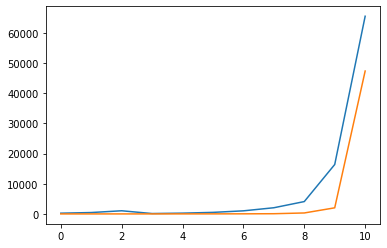

In [240]:
plt.plot(cmst_pts)

As seen above, the computeMST using Prims algorithm points show the exponential growth of the algorithm, whose complexity is O(ElogN), where e is the number of edges and n is the number of nodes